In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import string

from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize']= 14,6
plt.style.use('ggplot')


In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# importation du dataframe
df = pd.read_csv('X_train_update.csv',index_col=0)
df.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans.,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,"PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<br> Pour un confort optimal et une précision maximale sur le GamePad de la Wii U: ce grand stylet hautement ergonomique est non seulement parfaitement adapté à votre main mais aussi très élégant.<br> Il est livré avec un support qui se fixe sans adhésif à l'arrière du GamePad<br> <br> Caractéristiques:<br> Modèle: Speedlink PILOT STYLE Touch Pen<br> Couleur: Bleu<br> Ref. Fabricant: SL-3468-BE<br> Compatibilité: GamePad Nintendo Wii U<br> Forme particulièrement ergonomique excellente tenue en main<br> Pointe à revêtement longue durée conçue pour ne pas abîmer l'écran tactile<br> En bonus : Support inclu pour GamePad<br> <span class=""vga_style2""><b></b><br>",201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en &ecirc;tre le vainqueur incontest&eacute;. Mais Sophie s'en m&ecirc;le et chambarde tous ses plans...,278535884,1077757786


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


In [5]:
# ETUDE DE LA COLONNE DESIGNATION
df['designation'] = df['designation'].apply(lambda _: str(_))

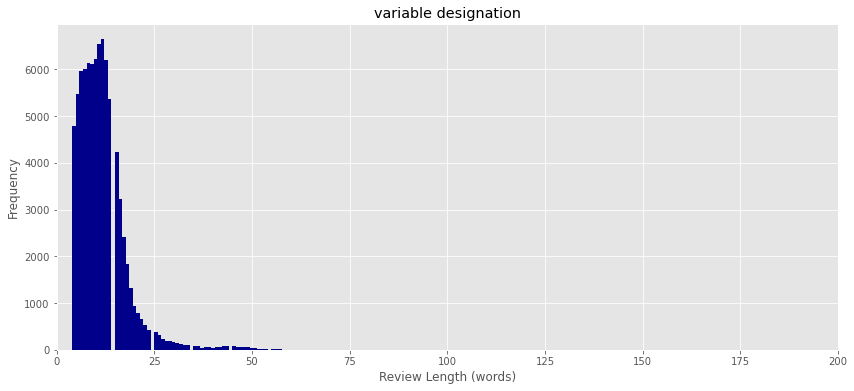

In [6]:
words_per_review = df.designation.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100, color='darkblue')
plt.title ('variable designation')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.show()

In [7]:
print('Average words de la variable designation:', words_per_review.mean())
print('Skewness de la variable designation:', words_per_review.skew())

Average words de la variable designation: 11.650925620613313
Skewness de la variable designation: 2.438238052042657


In [8]:
# ETUDE DE LA COLONNE DESCRIPTION
df['description'] = df['description'].apply(lambda _: str(_))

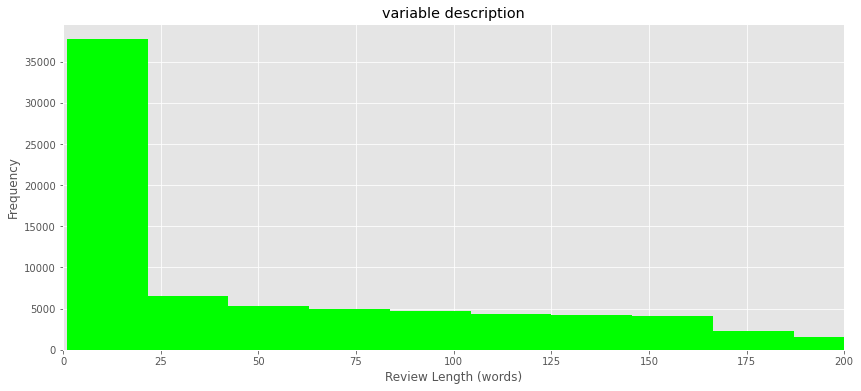

In [9]:
words_per_review2 = df.description.apply(lambda x: len(x.split(" ")))
words_per_review2.hist(bins = 100, color='lime')
plt.title ('variable description')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.show()

In [9]:
print('Average words de la variable description:', words_per_review2.mean())
print('Skewness de la variable description:', words_per_review2.skew())

Average words de la variable description: 81.11347684770833
Skewness de la variable description: 3.1630647668569902


In [ ]:
# il y a + de mots de la variable description ve designation, ce qui est logique

In [10]:
# ETUDE DE LA TARGET
target = pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

In [11]:
df['target'] =target
df.head(1)

,designation,description,productid,imageid,target
0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,nan,3804725264,1263597046,10


df['target'].value_counts()

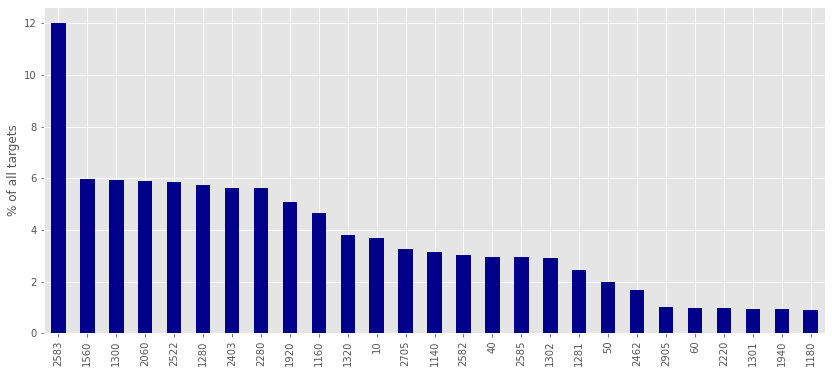

In [14]:
percent_target = 100 * df['target'].value_counts()/len(df)
percent_target.plot.bar(color='darkblue')
plt.ylabel('% of all targets')
plt.show()

<AxesSubplot:ylabel='target'>

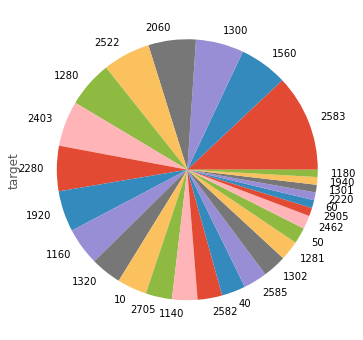

In [13]:
df['target'].value_counts().plot.pie()

In [10]:
# Removing all not alphanumeric characters (cleaning express 1)
df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [11]:
# Converting headlines to lower case (cleaning express 2 )
index = df.columns
index

Index(['designation', 'description', 'productid', 'imageid'], dtype='object')

In [ ]:
#for j in index:
  #  df[j]=df[j].str.lower()
#df.sample(3)

In [12]:
# Converting headlines to lower case (cleaning express 2 )
df['designation'] = df['designation'].str.lower() 
df['description'] = df['description'].str.lower() 

In [13]:
df.head(3)

,designation,description,productid,imageid
0,olivia personalisiertes notizbuch seiten punktraster ca din a rosen design,nan,3804725264,1263597046
1,journal des arts le n du l art et son marche salon d art asiatique a paris jacques barrere francois perrier la reforme des ventes aux encheres publiques le sna fete ses cent ans,nan,436067568,1008141237
2,grand stylet ergonomique bleu gamepad nintendo wii u speedlink pilot style,pilot style touch pen de marque speedlink est stylet ergonomique pour gamepad nintendo wii u br pour un confort optimal et une pr cision maximale sur le gamepad de la wii u ce grand stylet hautement ergonomique est non seulement parfaitement adapt votre main mais aussi tr s l gant br il est livr avec un support qui se fixe sans adh sif l arri re du gamepad br br caract ristiques br mod le speedlink pilot style touch pen br couleur bleu br ref fabricant sl be br compatibilit gamepad nintendo wii u br forme particuli rement ergonomique excellente tenue en main br pointe rev tement longue dur e con ue pour ne pas ab mer l cran tactile br en bonus support inclu pour gamepad br span class vga style b b br,201115110,938777978


In [14]:
# tokenization (cleaning express 3 )
from nltk.tokenize import word_tokenize
def tok (tx):
        token =  word_tokenize(tx)
        return token

In [15]:
df['designation'] = df['designation'].apply(tok)

In [16]:
df['description'] = df['description'].astype(str).apply(tok)

In [17]:
# remove stopwords (cleaning express 4 )
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stop_words = stopwords.words('english')####### stopwords.words('french')
stopwords =  set (eng_stop_words)  #######

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords2 = nltk.corpus.stopwords.words('french')
list_a_nettoyer = ('e','haute',"l'",'x',"'",'p','lumi','re','de','une','li','que','vous','mat','riel','x','X','cm','vous','b','d','pour','les','peut','tre','et','les','carac','h''de ','la ',"l '",'x ', 'cm ', 'ristiques','mat ','riel ','vous ','pla ','br','diff','diff ','rent','rent ', 'rents','rents ','int', 'int ','rieur','rieur ','rieures','rieures ','id','id ','al','al ','ra','ra ','qualit','qualit ','pla','pla ','sine','sine ','r','r ','g','g ','rique','rique ','sistant','sistant','nan','nan ','tout','tout ','sine','sine ','sol','ge','ge ','div','div ','strong','strong ','temp','temp ','si','si ','h','h ','cor','cor ','con','con ','imperm','imperm ','able','able ','sp,', 'cification','cification ','ext', 'ext ','ger','amp','nbsp','ans','span','span ','sp','sp ','cifications','cifications ','rement','rement ','non','non ','comprend','comprend ', 'contenu','contenu ','v','v ','diff','diff ','rent','rent ','rents','rents ','int','int ','rieur', 'rieur ','u','u ','eacute','eacute ','pr','pr ','gr','gr ','tr','tr ','ul','ul ','f','f ')

In [19]:
# Création d'une liste fusionnée des stopwords french & english puis list à nettoyer
for i in stopwords2:
    stopwords.append(i)
for j in list_a_nettoyer:
    stopwords.append(j)

In [23]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords]
    return words

In [21]:
df['designation'] = df['designation'].apply(remove_stopwords)

In [22]:
df['description'] = df['description'].apply(remove_stopwords)

In [24]:
# STEMMING OU LEMMATIZATION (cleaning optionnel 5 )
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
def stem(text):
    stemi = [ps.stem(word) for word in text]
    return stemi

In [48]:
df.head(3)

,designation,description,productid,imageid,target
0,"[olivia, personalisiertes, notizbuch, seiten, punktraster, ca, din, rosen, design]",[],3804725264,1263597046,10
1,"[journal, arts, art, marche, salon, art, asiatique, paris, jacques, barrere, francois, perrier, reforme, ventes, encheres, publiques, sna, fete, cent]",[],436067568,1008141237,2280
2,"[grand, stylet, ergonomique, bleu, gamepad, nintendo, wii, speedlink, pilot, style]","[pilot, style, touch, pen, marque, speedlink, stylet, ergonomique, gamepad, nintendo, wii, confort, optimal, cision, maximale, gamepad, wii, grand, stylet, hautement, ergonomique, seulement, parfaitement, adapt, main, aussi, gant, livr, support, fixe, sans, adh, sif, arri, gamepad, caract, mod, speedlink, pilot, style, touch, pen, couleur, bleu, ref, fabricant, sl, compatibilit, gamepad, nintendo, wii, forme, particuli, ergonomique, excellente, tenue, main, pointe, rev, tement, longue, dur, ue, ab, mer, cran, tactile, bonus, support, inclu, gamepad, class, vga, style]",201115110,938777978,50


In [49]:
# réalisation de la jointure des 2 colonnes texte du dataframe
headlines = []  #####
for row in range(0,len(df.index)):
    headlines.append(' '.join(str(x) for x in df.iloc[row,0:2]))

In [50]:
headlines

["['olivia', 'personalisiertes', 'notizbuch', 'seiten', 'punktraster', 'ca', 'din', 'rosen', 'design'] []",
 "['journal', 'arts', 'art', 'marche', 'salon', 'art', 'asiatique', 'paris', 'jacques', 'barrere', 'francois', 'perrier', 'reforme', 'ventes', 'encheres', 'publiques', 'sna', 'fete', 'cent'] []",
 "['grand', 'stylet', 'ergonomique', 'bleu', 'gamepad', 'nintendo', 'wii', 'speedlink', 'pilot', 'style'] ['pilot', 'style', 'touch', 'pen', 'marque', 'speedlink', 'stylet', 'ergonomique', 'gamepad', 'nintendo', 'wii', 'confort', 'optimal', 'cision', 'maximale', 'gamepad', 'wii', 'grand', 'stylet', 'hautement', 'ergonomique', 'seulement', 'parfaitement', 'adapt', 'main', 'aussi', 'gant', 'livr', 'support', 'fixe', 'sans', 'adh', 'sif', 'arri', 'gamepad', 'caract', 'mod', 'speedlink', 'pilot', 'style', 'touch', 'pen', 'couleur', 'bleu', 'ref', 'fabricant', 'sl', 'compatibilit', 'gamepad', 'nintendo', 'wii', 'forme', 'particuli', 'ergonomique', 'excellente', 'tenue', 'main', 'pointe', 'rev

In [51]:
words = [item for sublist in headlines for item in sublist]
print("Number of unique tokens now: ",len(set(words)))

Number of unique tokens now:  31


In [ ]:
# Text visualization using word clouds (word clouds )

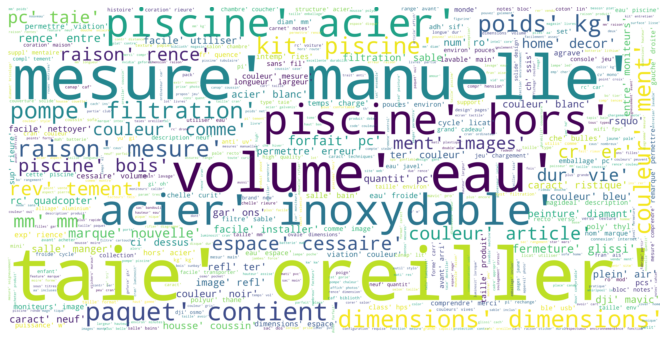

In [52]:
# WORD CLOUD APRES AJOUT LISTE NETTOYAGE
word_cloud_text = ''.join(headlines)

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=1000, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

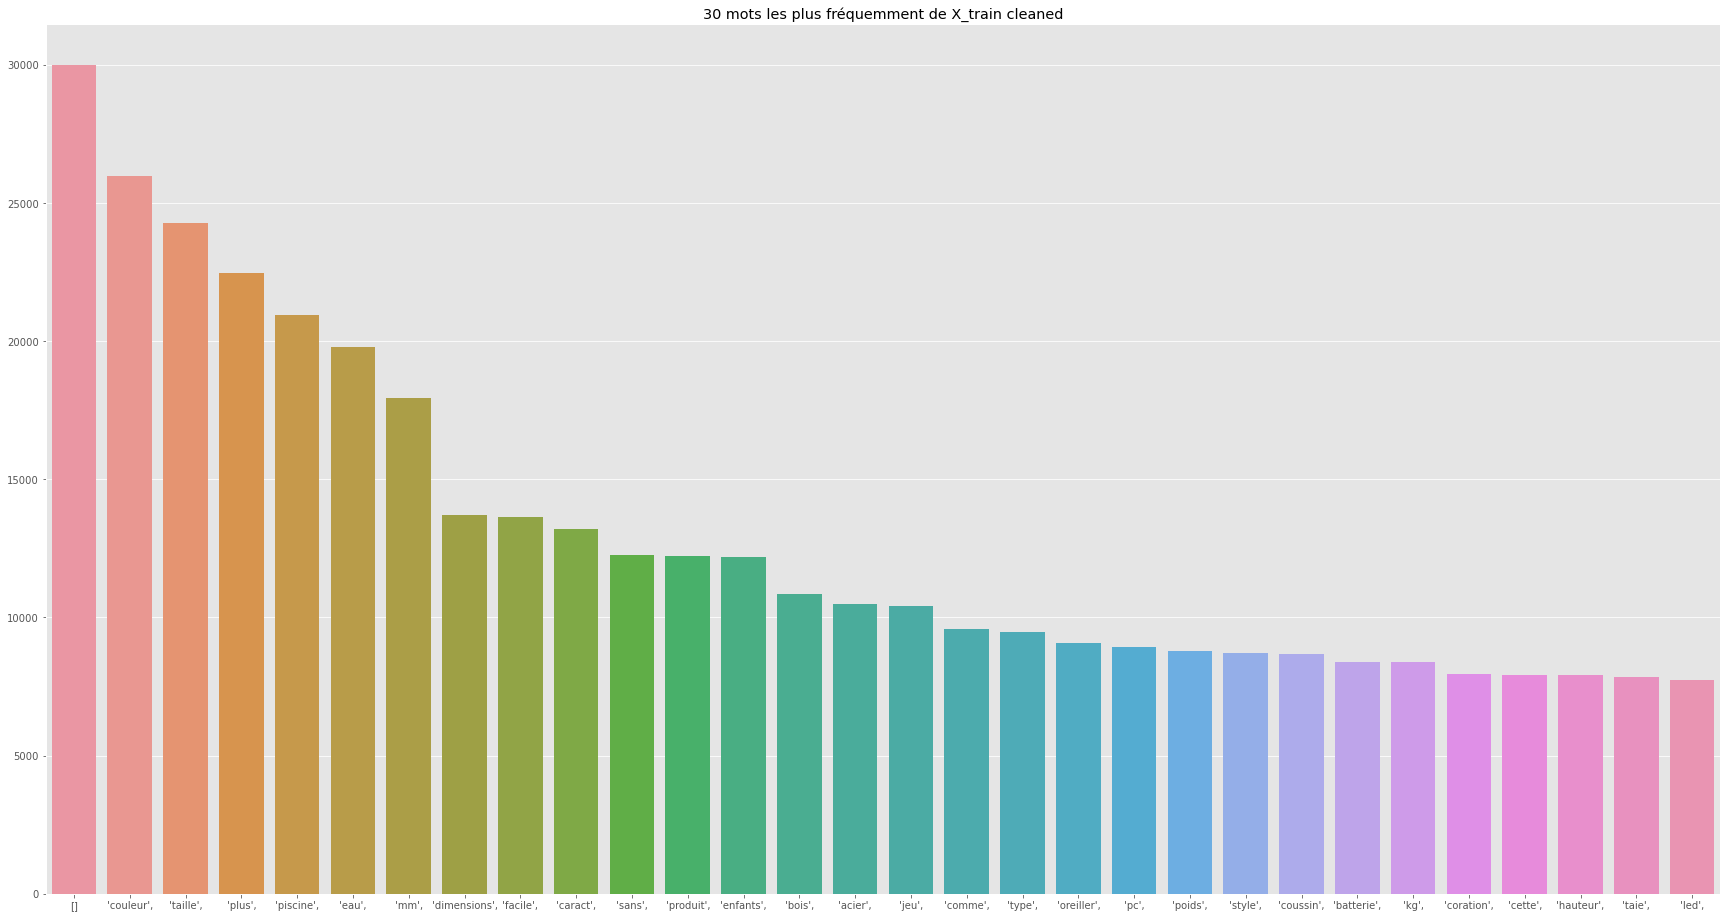

In [53]:
from collections import Counter
import seaborn as sns 
chaine = ' '.join(i for i in headlines) ###################
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(30)]
freq = [m[1] for m in dico.most_common(30)]

plt.figure(figsize= (30,16))
sns.barplot(x=mots, y=freq)
plt.title('30 mots les plus fréquemment de X_train cleaned');

In [ ]:
###################################################################


In [55]:
df['designation'] = df['designation'].apply(lambda _: str(_)) 

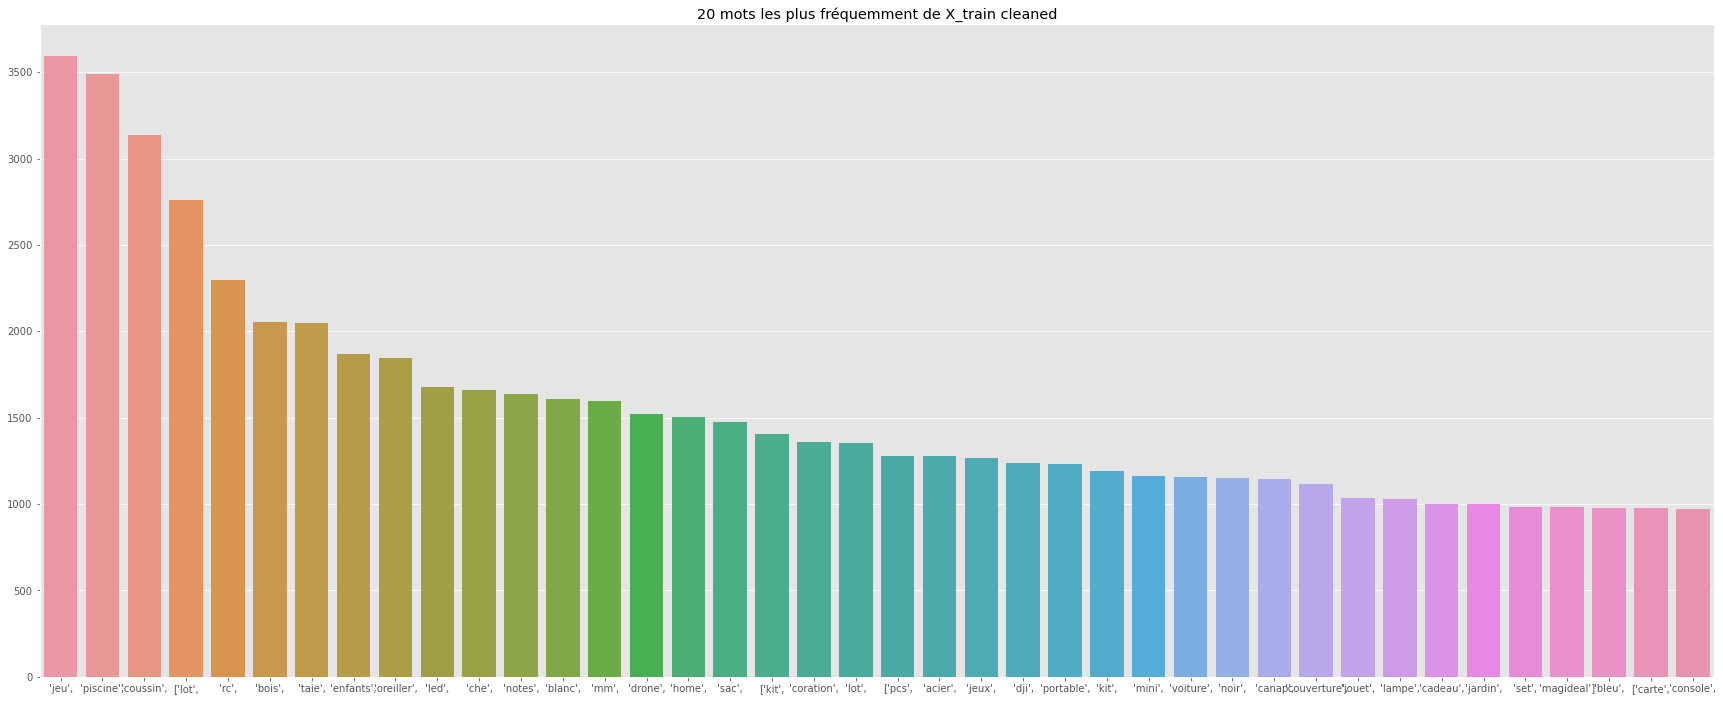

In [56]:
# En comparatif : 
from collections import Counter
import seaborn as sns 
chaine = ' '.join(i for i in df['designation'])
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(40)]
freq = [m[1] for m in dico.most_common(40)]

plt.figure(figsize= (30,12))
sns.barplot(x=mots, y=freq)
plt.title('20 mots les plus fréquemment de X_train cleaned');

In [57]:
token_lists = [word_tokenize(e) for e in df['designation'].astype(str)] #####
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens now:  58256


In [58]:
df['target'] = target #on rajoute y_train dans X_train temporairement pour simplifier la tache

df.head(1)

,designation,description,productid,imageid,target
0,"['olivia', 'personalisiertes', 'notizbuch', 'seiten', 'punktraster', 'ca', 'din', 'rosen', 'design']",[],3804725264,1263597046,10


In [59]:
newdf = pd.DataFrame({'Features': headlines})

In [60]:
newdf.head()

,Features
0,"['olivia', 'personalisiertes', 'notizbuch', 'seiten', 'punktraster', 'ca', 'din', 'rosen', 'design'] []"
1,"['journal', 'arts', 'art', 'marche', 'salon', 'art', 'asiatique', 'paris', 'jacques', 'barrere', 'francois', 'perrier', 'reforme', 'ventes', 'encheres', 'publiques', 'sna', 'fete', 'cent'] []"
2,"['grand', 'stylet', 'ergonomique', 'bleu', 'gamepad', 'nintendo', 'wii', 'speedlink', 'pilot', 'style'] ['pilot', 'style', 'touch', 'pen', 'marque', 'speedlink', 'stylet', 'ergonomique', 'gamepad', 'nintendo', 'wii', 'confort', 'optimal', 'cision', 'maximale', 'gamepad', 'wii', 'grand', 'stylet', 'hautement', 'ergonomique', 'seulement', 'parfaitement', 'adapt', 'main', 'aussi', 'gant', 'livr', 'support', 'fixe', 'sans', 'adh', 'sif', 'arri', 'gamepad', 'caract', 'mod', 'speedlink', 'pilot', 'style', 'touch', 'pen', 'couleur', 'bleu', 'ref', 'fabricant', 'sl', 'compatibilit', 'gamepad', 'nintendo', 'wii', 'forme', 'particuli', 'ergonomique', 'excellente', 'tenue', 'main', 'pointe', 'rev', 'tement', 'longue', 'dur', 'ue', 'ab', 'mer', 'cran', 'tactile', 'bonus', 'support', 'inclu', 'gamepad', 'class', 'vga', 'style']"
3,"['peluche', 'donald', 'europe', 'disneyland', 'marionnette', 'doigt'] []"
4,"['guerre', 'tuques'] ['luc', 'grandeur', 'veut', 'organiser', 'jeu', 'guerre', 'boules', 'neige', 'arranger', 'ecirc', 'vainqueur', 'incontest', 'sophie', 'ecirc', 'chambarde', 'tous', 'plans']"


In [62]:
from sklearn.model_selection import train_test_split

X= newdf['Features']
y= target['prdtypecode']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, test_size = 0.1, random_state = 0)

In [63]:
print(X_train.shape, X_test.shape)

(25474,) (8492,)


In [64]:
print(y_train.shape, y_test.shape)

(25474,) (8492,)


In [65]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 


In [66]:
# Mettre à jour la valeur de X_train et X_test
X_train = cv.fit_transform(X_train).todense()
X_test = cv.transform(X_test).todense()

# 1st loop Applying logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))   # target_names=target_names

              precision    recall  f1-score   support

          10       0.33      0.63      0.44       288
          40       0.62      0.55      0.58       269
          50       0.74      0.72      0.73       165
          60       0.91      0.88      0.89        90
        1140       0.78      0.74      0.76       268
        1160       0.89      0.92      0.90       411
        1180       0.74      0.46      0.57        80
        1280       0.60      0.56      0.58       470
        1281       0.59      0.48      0.53       190
        1300       0.86      0.83      0.84       524
        1301       1.00      0.83      0.91        87
        1302       0.79      0.62      0.69       264
        1320       0.71      0.70      0.70       306
        1560       0.80      0.80      0.80       512
        1920       0.87      0.88      0.88       419
        1940       0.96      0.78      0.86        64
        2060       0.76      0.72      0.74       493
        2220       0.96    

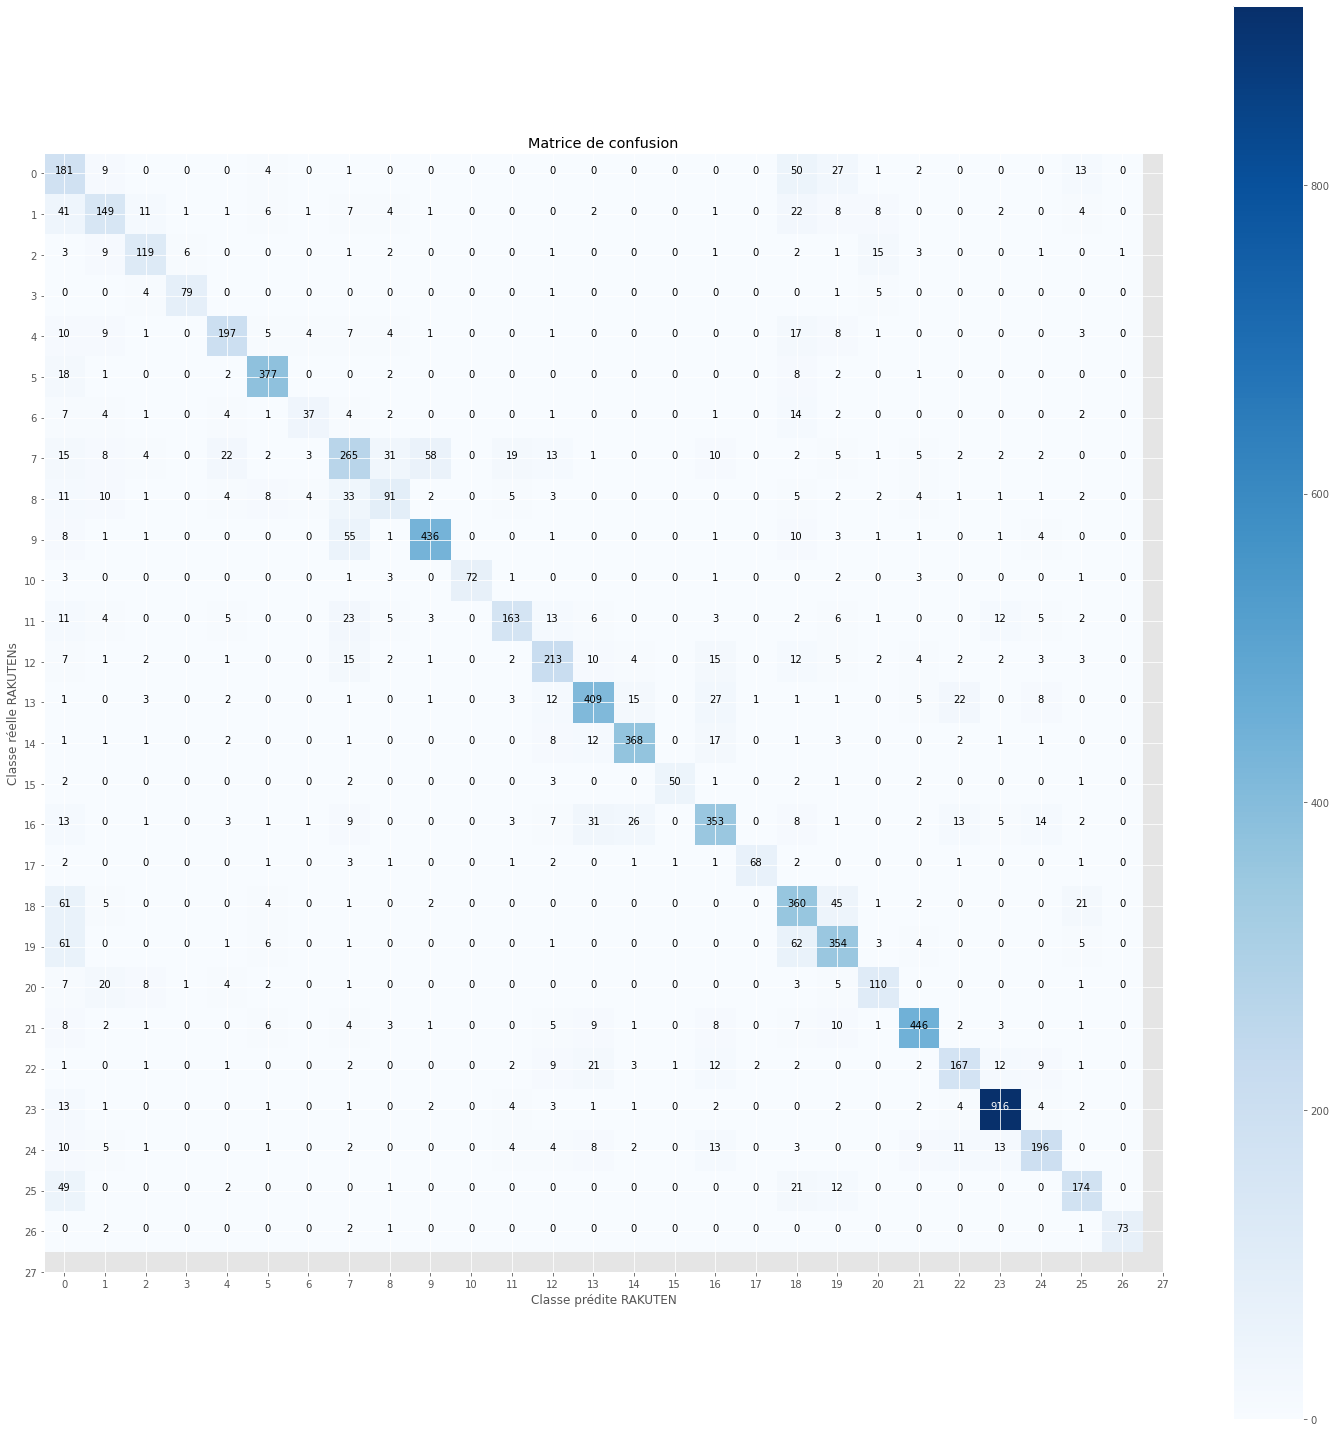

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

cnf_matrix = confusion_matrix(y_test,y_pred)

classes = range(0,28)# pour améliorer le graph

plt.figure(figsize=(20,20))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.tight_layout()
plt.ylabel('Classe réelle RAKUTENs')
plt.xlabel('Classe prédite RAKUTEN')
plt.show()

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
    max_depth=3, random_state=0).fit(X_train, y_train)

In [ ]:
y_pred2=clf2.predict(X_test)